## Learning Objectives

Today we learn how a computer learns from data. But we also learn about the problem that comes from the computer learning from data: the data we train on becomes less useful for understanding validation.

# I learn, you learn

In the previous class we learned that we can learn! That was quite the amazing discovery. 

But do you remember how we did it? We tested a single hypothesis against the data. And how did we come up with the hypothesis? Well we thought really hard.

Now this strategy may work well if you are a real expert in the area, for example a doctor that already knows how to diagnose. But for a data scientist, it is a no go. 

Typically the data scientist offloads that job to the computer. Today we are going to discuss how we make the computer do this task, and why the computer can learn!

## Assumptions and review

Before we press on, it will be important for us to review what we have done thusfar. And this starts be reviewing our assumptions:

In [ ]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

c0 = 'Unknown target function, f(X) = y'
c1 = 'Inputs, (x_1, y_1), ..., (x_n, y_n)'
c2 = 'Learning Algorithm'
c3 = 'Hypothesis set, H'
c4 = 'Final Hypothesis, g(X) = y'
c5 = 'IID samples from a r.v. X'

G = nx.DiGraph()
G.add_node(c0)
G.add_node(c1)
G.add_edge(c0, c1)
G.add_node(c2)
G.add_edge(c1, c2)
G.add_node(c3)
G.add_edge(c3, c2)
G.add_node(c4)
G.add_edge(c2, c4)
G.add_node(c5)
G.add_edge(c5, c1)

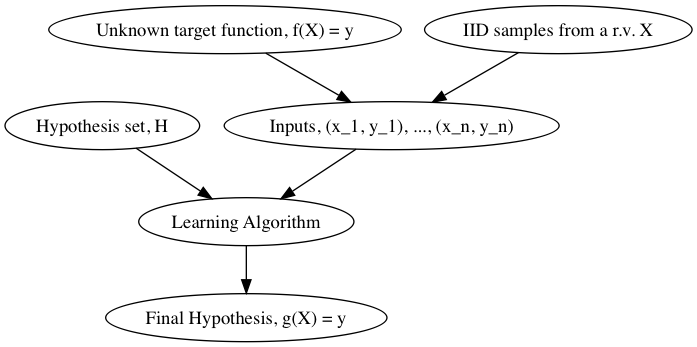

In [2]:
draw(G)

# How do computers learn

Now that we have reviewed again our assumptions, let's go over how computers learn. 

First thing that we should know is that computers are not that smart. They are really good at simple repetative actions, but not much else. So how can a computer learn...

Well there are two steps:

1. You as the human provide the set of hypotheses
2. The computer tests each hypothesis on the data and tells you which is the best one

Yep that is it. Computer does what it does best and you do what you do best. Now that second step can be quite complex though. Most sets of hypotheses have infinite numbers of hypotheses, so you will need to be very careful with how you search through them.

But now that you know how they learn, it is time for a break.

# Interlude
---
## Flipping coins

I ask a question:

<blockquote>
If I flip a fair coin 10 times, what is the probability that I will get 10 heads?
</blockquote>

Well you can probably guess that it is pretty low, but it is around .1%, so pretty unlikely.

Now let me ask you a different question:

<blockquote>
If I flip a 1000 fair coins 10 times, what is the probability any of them will get 10 heads?
</blockquote>

It still has to be pretty low right? Wrong. The answer is 63%. It is pretty likely that we will be getting one with 10 heads. 

Well what does this have to do with learning. Well let's return to our original question, what if we have multiple hypotheses? So let me rephrase the above:

<blockquote>
If pick a random hypothesis, what is the probability it will match all 10 of my data points?
</blockquote>


Pretty low right, but let's ask one more:

<blockquote>
If pick a 1000 random hypotheses, what is the probability that one of them will match all 10 of my data points?
</blockquote>

You see the connection?

Don't believe me? Well let's check out the example from last time:

In [1]:
import numpy as np

def rg_bin():
    # remember what this number was???
    secret_probability = 1 / float(0b0100) 

    if secret_probability < np.random.rand():
        return 'r'
    else:
        return 'g'

In [2]:
# there is only a tiny chance this will be all g
sample = [rg_bin() for _ in range(5)]

sample

['r', 'g', 'r', 'g', 'r']

In [6]:
# but this will certainly
for _ in range(1000):
    sample = np.array([rg_bin() for _ in range(5)])
    
    if np.all(sample == 'g'):
        print 'Found one!'

Found one!
Found one!
Found one!


## Connection to learning

Remember our ball example from before in this class. There was a 25% chance that we'd get a green ball each time we sampled. But even though the probablity of getting a green ball was low, if we tried enough times, we could find a sample that contains all green balls. Okay waht's the problem with this?

Well let me replace every time I use green ball with correct prediction:

...There was a 25% chance that we'd get a correct prediction each time we sampled. But even though the probablity of getting a correct prediction was low, if we tried enough times, we could find a set of samples that contain all correct predictions...

So even if we have a hypothesis that's right 25% of the time, there is a high chance to find a sample where it is right 100%, as long as we take enough samples. 


### The problem

Well what we have just said is that if we try enough hypotheses, there is likely to be one that is really good on our particular sample, but might not be good on the population as a whole. Because we used that data to train the hypothesis, we cannot use it to test the hypothesis. It would be like testing a class only on questions they had seen before.

## Up a creek

So we are back to where we had started two lessons ago. 

We now know how computers learn, but if we use the data to let the computers learn, we can no longer test to make sure they have learned anything. Our next class will teach us one of the many ways to get around this problem.

## Next time

Hopefully this will statisfy you for now. Next time we will talk about two things that we glossed over today: error measures and the test set. And at that point you will get the full picture of basic machine learning. 

Thence we will expound on our learning picture with noise and review what we have covered, drilling in the lessons learned, and explaining the most important phenomenon: the bias-variance tradeoff.

## Learning Objectives

Today we learn how a computer learns from data. But we also learn about the problem that comes from the computer learning from data: the data we train on becomes less useful for understanding validation.

## Comprehension questions

1. If only we could figure out what the difference between the error on the sample and the population is? If you had access to the full population could you figure it out? What comes next?
1.	Why do we want to offload learning to a computer? 
2.	What is the human’s part in all of this?
3.	Can computers learn better than humans?
4.	What happens in the learning algorithm? Why is it important?
5.	We learned the chance of a rare event occurring increases as the number of events increases. Why is that? Is this always true?
